In [ ]:
import numpy as np # linear algebra
import pandas as pd

ratings = pd.read_csv('ratings.csv')

ratings= ratings.drop(['userId', 'timestamp'], axis=1)

ratings= ratings.groupby(ratings['movieId']).aggregate({'rating': 'mean'})
ratings.head()

,rating
movieId,
1.0,3.888769
2.0,3.224224
3.0,3.167447
4.0,2.888247
5.0,3.079760


# Cleaning Data For Genres Rating

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
import json

#movies data 
movies = pd.read_csv('movies_metadata.csv')

drop_movies = ["homepage", "poster_path", "video", "imdb_id", "overview", "original_title", 
           "spoken_languages", "tagline","belongs_to_collection","production_companies","production_countries"]

movies = movies.drop(drop_movies, axis=1) # Remove unnecessary columns containing "drop_movies" list
movies = movies.drop_duplicates(keep='first') # Remove if there is duplicate
movies.dropna(inplace=True) # null olan sutunları kaldır

movies["id"] =pd.to_numeric(movies['id'], errors='coerce', downcast="integer")  #Since identity types are objective, we convert them to an integer.


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


**list counter**


In [ ]:
def list_counter(col, limiter = 9999, log = True):
    result = dict()
    for cell in col:
        if isinstance(cell, float):
            continue
        for element in cell:
            if element in result:
                result[element] += 1
            else:
                result[element] = 1
    if log:
        print("Size of words:", len(result))
    result = {k: v for k, v in sorted(result.items(), key=lambda item: item[1], reverse=True)}
    if log:
        print("Sorted result is:")
    counter = 1
    sum_selected = 0
    total_selected = 0
    rest = 0
    returned = []
    for i in result: 
        if counter > limiter:
            total_selected += result[i]
        else:
            counter += 1
            sum_selected += result[i]
            total_selected += result[i]
            if log:
                print(result[i], " - ", i) 
            returned.append([i, result[i]])
    if log:
        print("Covered:", sum_selected, "out of", total_selected, "\n")
    return returned

**Json to Arr for genres json**

In [ ]:
def json_to_arr(cell, wanted = "name"): 
    cell = literal_eval(cell)
    if cell == [] or (isinstance(cell, float) and cell.isna()):
        return np.nan
    result = []
    counter = 0
    for element in cell:
        if counter < 3:
            result.append(element[wanted])
            counter += 1
        else:
            break
    return result[:3]

In [ ]:
movies[['genres']] = movies[['genres']].applymap(json_to_arr)
movies.head(10)

,adult,budget,genres,id,original_language,popularity,release_date,revenue,runtime,status,title,vote_average,vote_count
0,False,30000000,"[Animation, Comedy, Family]",862,en,21.9469,1995-10-30,373554033.0,81.0,Released,Toy Story,7.7,5415.0
1,False,65000000,"[Adventure, Fantasy, Family]",8844,en,17.0155,1995-12-15,262797249.0,104.0,Released,Jumanji,6.9,2413.0
2,False,0,"[Romance, Comedy]",15602,en,11.7129,1995-12-22,0.0,101.0,Released,Grumpier Old Men,6.5,92.0
3,False,16000000,"[Comedy, Drama, Romance]",31357,en,3.85949,1995-12-22,81452156.0,127.0,Released,Waiting to Exhale,6.1,34.0
4,False,0,[Comedy],11862,en,8.38752,1995-02-10,76578911.0,106.0,Released,Father of the Bride Part II,5.7,173.0
5,False,60000000,"[Action, Crime, Drama]",949,en,17.9249,1995-12-15,187436818.0,170.0,Released,Heat,7.7,1886.0
6,False,58000000,"[Comedy, Romance]",11860,en,6.67728,1995-12-15,0.0,127.0,Released,Sabrina,6.2,141.0
7,False,0,"[Action, Adventure, Drama]",45325,en,2.56116,1995-12-22,0.0,97.0,Released,Tom and Huck,5.4,45.0
8,False,35000000,"[Action, Adventure, Thriller]",9091,en,5.23158,1995-12-22,64350171.0,106.0,Released,Sudden Death,5.5,174.0
9,False,58000000,"[Adventure, Action, Thriller]",710,en,14.686,1995-11-16,352194034.0,130.0,Released,GoldenEye,6.6,1194.0


**fill nan with** 

In [ ]:
def fill_na_with_list(cell, data):
    if isinstance(cell, float):
        return data
    else:
        return cell

In [ ]:
genres_occur = list_counter(movies["genres"].values, log=False)

In [ ]:
movies[['genres']] = movies[['genres']].applymap(lambda row:
                                        fill_na_with_list(row, [genres_occur[0][0]]))

In [ ]:
vote_counts = movies[movies['vote_count'].notnull()]['vote_count'].astype('int') #vote count
vote_averages = movies[movies['vote_average'].notnull()]['vote_average'].astype('int') #vote avarege for genres avarege

# Genres Average ana movies Average

**Type Weighted rating function**

In [ ]:
C = vote_averages.mean()
m = vote_counts.quantile(0.75)
def weighted_rating(data):
    v = data['vote_count'] + 1 
    R = data['vote_average']
    return (v / (v + m) * R) + (m / (m + v) * C)

In [ ]:
movies['weighted_rating'] = movies.apply(weighted_rating, axis=1)  #new columns weighter rating
movies.head(10)

,adult,budget,genres,id,original_language,popularity,release_date,revenue,runtime,status,title,vote_average,vote_count,weighted_rating
0,False,30000000,"[Animation, Comedy, Family]",862,en,21.9469,1995-10-30,373554033.0,81.0,Released,Toy Story,7.7,5415.0,7.684347
1,False,65000000,"[Adventure, Fantasy, Family]",8844,en,17.0155,1995-12-15,262797249.0,104.0,Released,Jumanji,6.9,2413.0,6.876593
2,False,0,"[Romance, Comedy]",15602,en,11.7129,1995-12-22,0.0,101.0,Released,Grumpier Old Men,6.5,92.0,6.161534
3,False,16000000,"[Comedy, Drama, Romance]",31357,en,3.85949,1995-12-22,81452156.0,127.0,Released,Waiting to Exhale,6.1,34.0,5.681090
4,False,0,[Comedy],11862,en,8.38752,1995-02-10,76578911.0,106.0,Released,Father of the Bride Part II,5.7,173.0,5.626681
5,False,60000000,"[Action, Crime, Drama]",949,en,17.9249,1995-12-15,187436818.0,170.0,Released,Heat,7.7,1886.0,7.655607
6,False,58000000,"[Comedy, Romance]",11860,en,6.67728,1995-12-15,0.0,127.0,Released,Sabrina,6.2,141.0,6.014556
7,False,0,"[Action, Adventure, Drama]",45325,en,2.56116,1995-12-22,0.0,97.0,Released,Tom and Huck,5.4,45.0,5.340448
8,False,35000000,"[Action, Adventure, Thriller]",9091,en,5.23158,1995-12-22,64350171.0,106.0,Released,Sudden Death,5.5,174.0,5.460363
9,False,58000000,"[Adventure, Action, Thriller]",710,en,14.686,1995-11-16,352194034.0,130.0,Released,GoldenEye,6.6,1194.0,6.561932


In [ ]:
q_movies = movies.sort_values('weighted_rating', ascending = False)

In [ ]:
q_movies[['title', 'vote_count', 'vote_average', 'weighted_rating']].head(20)

,title,vote_count,vote_average,weighted_rating
10309,Dilwale Dulhania Le Jayenge,661.0,9.1,8.907283
314,The Shawshank Redemption,8358.0,8.5,8.486499
834,The Godfather,6024.0,8.5,8.481300
40251,Your Name.,1030.0,8.5,8.393693
12481,The Dark Knight,12269.0,8.3,8.291359
2843,Fight Club,9678.0,8.3,8.289055
292,Pulp Fiction,8670.0,8.3,8.287787
522,Schindler's List,4436.0,8.3,8.276225
23673,Whiplash,4376.0,8.3,8.275901
5481,Spirited Away,3968.0,8.3,8.273446


**Movie Analys show**

In [ ]:
import plotly.express as px
data = q_movies[['title', 'vote_count', 'vote_average', 'weighted_rating']].head(20)

fig = px.bar(data, x = 'title', y = 'weighted_rating',
             hover_data = ['vote_count', 'vote_average'], color='weighted_rating',
             labels = {'weighted_rating':'weighted_rating', 'title': 'Movie Name'}, height = 400,
             title = 'Movie rating disturbition')
fig.show()


According to our analysis, we can say that the most preferred and rated film is Dilwale.

**Moive Rating**

In [ ]:
df_genres = movies[["title","genres","weighted_rating"]]  #we take the necessary places
genres = list_counter(df_genres["genres"].values, log=False)

**List To Column**

In [ ]:
def list_to_col(data, col_name, col_list, limiter = 9999):
    counter = 0
    selected_items = set()
    for item in col_list:
        if counter >= limiter:
            break
        item = item[0]
        data[item] = 0
        selected_items.add(item)
        counter += 1
    
    for index, row in data.iterrows():
        for item in row[col_name]:  
            if item in selected_items:
                data.at[index, item] = 1
    data.drop([col_name], axis=1, inplace=True)
    return data

In [ ]:
df_genres = list_to_col(df_genres, "genres", genres)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


**Average dataset builder**

In [ ]:
def binary_mean_dataset_generator(data, col_list, limiter = 9999):
    counter = 0
    items = []
    for item in col_list:
        if counter >= limiter:
            break
        items.append(item[0])
        counter += 1
    rows = []
    for item in items:
        value = data[data[item] == 1].mean()
        rows.append([item, value[0]])
    
    df_genres_means = pd.DataFrame(rows, columns=["type", "rating"])
    return df_genres_means

In [ ]:
df_means_genres = binary_mean_dataset_generator(df_genres, genres) #new df_means average 

**Film types analysis according to their ratings**

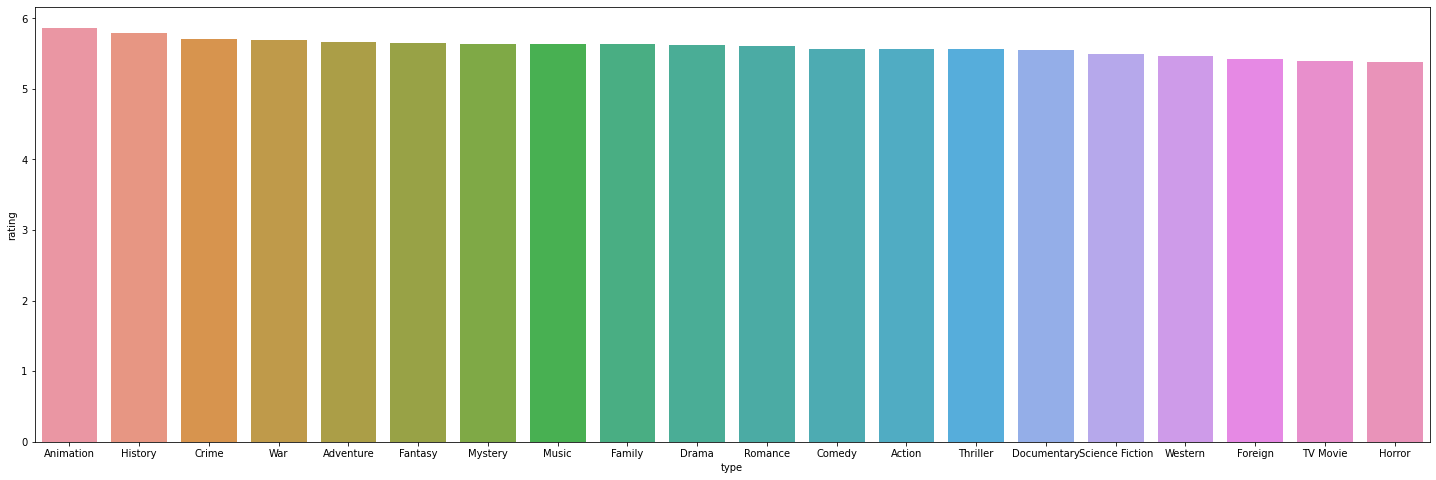

In [ ]:
plt.figure(figsize=(25,8))
sns.barplot(x='type', y='rating', data=df_means_genres,order=df_means_genres.sort_values('rating',ascending = False).type)
plt.show()

According to the analysis, we can say that animation is the most preferred and graded type.

# Cleaning for User movie preference

In [ ]:
movies = pd.read_csv('movies_metadata.csv')

drop_movies = ["homepage", "poster_path", "video", "imdb_id", "overview", "original_title", 
           "spoken_languages", "tagline","belongs_to_collection","production_companies","production_countries"]

movies = movies.drop(drop_movies, axis=1) # Remove unnecessary columns containing "drop_movies" list
movies = movies.drop_duplicates(keep='first') # Remove if there is duplicate
movies.dropna(inplace=True) # null olan sutunları kaldır

movies["id"] =pd.to_numeric(movies['id'], errors='coerce', downcast="integer")  #Since identity types are objective, we convert them to an integer.

ratings = pd.read_csv('ratings.csv')
ratings.drop(['timestamp'], axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
movies.duplicated(['id', 'title']).sum() 
ratings.duplicated(['userId', 'movieId']).sum() #total number of copies?

0

**json to array**

In [ ]:
movies[['genres']] = movies[['genres']].applymap(json_to_arr)

genres = movies[['title',"genres"]]
genres.head()

,title,genres
0,Toy Story,"[Animation, Comedy, Family]"
1,Jumanji,"[Adventure, Fantasy, Family]"
2,Grumpier Old Men,"[Romance, Comedy]"
3,Waiting to Exhale,"[Comedy, Drama, Romance]"
4,Father of the Bride Part II,[Comedy]


In [ ]:
ratings_df=ratings
ratings = pd.merge(ratings, movies, left_on='movieId', right_on='id') 

In [ ]:
ratings.dropna(inplace=True)  #drop null

In [ ]:
ratings_count = ratings.groupby(['title'])['rating'].count().reset_index() #Total number of score records for each movie

In [ ]:
ratings_count = ratings_count.rename(columns={'rating':'totalRatings'}) #rename rating to total rating

In [ ]:
ratings_total = pd.merge(ratings,ratings_count, on='title', how='left') #merge

In [ ]:
ratings_matrix = ratings.pivot_table(index='userId', columns='title', values='rating').fillna(0)
ratings_matrix.head(20)

title,!Women Art Revolution,"$1,000 on the Black",$5 a Day,'Gator Bait,'R Xmas,'Twas the Night Before Christmas,(A)Sexual,...And God Created Woman,...And the Pursuit of Happiness,00 Schneider - Jagd auf Nihil Baxter,10 Items or Less,10 Things I Hate About You,"10,000 BC",100 Years at the Movies,11'09''01 - September 11,12 Angry Men,12 Dates of Christmas,12 Wishes of Christmas,127 Hours,13 Sins,13 Tzameti,1408,15 Minutes,16 Blocks,17 Girls,1900,1942: A Love Story,1984,1st to Die,2 Days in Paris,2 Fast 2 Furious,"20,000 Leagues Under the Sea",2001: A Space Odyssey,2001: A Space Travesty,2010,2046,20th Century Boys - Chapter 1: Beginning of the End,21 Grams,23,24 Hour Party People,...,Z,Zaat,Zabriskie Point,Zamfir's Zona,Zandalee,Zandy's Bride,Zapped Again!,Zardoz,Zathura: A Space Adventure,Zatoichi,Zatôichi and the Doomed Man,Zatôichi at Large,Zatôichi the Outlaw,Zatôichi's Pilgrimage,Zazie dans le métro,Zero for Conduct,Zhit,Zidane - A 21st Century Portrait,Zig Zag,Zigeunerweisen,Zodiac,Zombie Flesh Eaters,Zombie Holocaust,Zombie Island Massacre,Zoo in Budapest,Zorns Lemma,Zozo,Zvenigora,[REC],eXistenZ,ivans xtc.,xXx,¡A volar joven!,¡Three Amigos!,À nos amours,Åke and His World,Æon Flux,Ödipussi,Şaban Oğlu Şaban,Šíleně smutná princezna
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [ ]:
import plotly.express as px

flattened=pd.DataFrame(ratings_matrix.to_records())
for i in range(0,10):
  data=flattened.iloc[i,1:]
  df = pd.DataFrame({'Movie rating':data.index, 'User':data.values})
  fig = px.bar(df, x ="Movie rating", y = 'User ', color='User Ratings',
            labels = {'User':'User ', 'Genres': 'Movie Name'}, height = 400,
            title = "{}. User rating for Genres ".format(i+1))
  fig.show()
  

**Recommendations using KNearestNeighbors method**

In [ ]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

df_for_knn =ratings_matrix.T
df_for_knn_sparse = csr_matrix(df_for_knn)

model_knn = NearestNeighbors(metric='cosine',algorithm='brute')

In [ ]:
model_knn.fit(df_for_knn_sparse)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [ ]:
query_index = np.random.choice(df_for_knn.shape[0])

In [ ]:
distances, indices = model_knn.kneighbors(df_for_knn.loc['Batman Returns'].values.reshape(1,-1),n_neighbors=6)

In [ ]:
for i in range(0,len(distances.flatten())):
    if i==0:
        print("Recommendations for movie: {0}\n".format(df_for_knn.index[query_index]))
    else:
        print("{0}: {1}, with distance of {2}".format(i,df_for_knn.index[indices.flatten()[i]],distances.flatten()[i]))

Recommendations for movie: Confessions from a Holiday Camp

1: Silent Hill, with distance of 0.33679342565015424
2: To Kill a Mockingbird, with distance of 0.3491403808972181
3: Reservoir Dogs, with distance of 0.41599199145082877
4: Monsoon Wedding, with distance of 0.42386339912415727
5: A Nightmare on Elm Street, with distance of 0.4559142152397605


# Cleaning Data for types of users

In [ ]:
movies = pd.read_csv('movies_metadata.csv')

drop_movies = ["homepage", "poster_path", "video", "imdb_id", "overview", "original_title", 
           "spoken_languages", "tagline","belongs_to_collection","production_companies","production_countries"]

movies = movies.drop(drop_movies, axis=1) # Remove unnecessary columns containing "drop_movies" list
movies = movies.drop_duplicates(keep='first') # Remove if there is duplicate
movies.dropna(inplace=True) # null olan sutunları kaldır

movies["id"] =pd.to_numeric(movies['id'], errors='coerce', downcast="integer")  #Since identity types are objective, we convert them to an integer.

ratings = pd.read_csv('ratings.csv')
ratings.drop(['timestamp'], axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
movies[['genres']] = movies[['genres']].applymap(json_to_arr)

genres = movies[["genres"]]

movies['movieId'] = [i for i in range(0,len(movies))]

movies=movies[["movieId","title","genres"]]


In [ ]:
movies.dropna(inplace=True)    #null drop
ratings.dropna(inplace=True)

# Determining user types

**Separate listed types in columns**

In [ ]:
temp = movies.apply(lambda x: pd.Series(x["genres"]),axis=1).stack().reset_index(level=1,drop=True)
temp.name="genres"
genres_new=movies.drop("genres",axis=1).join(temp)
genres_new["genres"]=pd.Series(genres_new["genres"],dtype=object)
new_data= pd.merge(ratings, genres_new)
new_data.groupby("genres")["rating"].describe()

,count,mean,std,min,25%,50%,75%,max
genres,,,,,,,,
Action,1333059.0,3.549871,1.074450,0.5,3.0,4.0,4.0,5.0
Adventure,1007116.0,3.607975,1.062496,0.5,3.0,4.0,4.5,5.0
Animation,289443.0,3.529182,1.042476,0.5,3.0,4.0,4.0,5.0
Comedy,2778832.0,3.505146,1.065229,0.5,3.0,3.5,4.0,5.0
Crime,898864.0,3.497417,1.058278,0.5,3.0,3.5,4.0,5.0
Documentary,215523.0,3.498898,1.044472,0.5,3.0,3.5,4.0,5.0
Drama,4004205.0,3.534887,1.067883,0.5,3.0,4.0,4.0,5.0
Family,643544.0,3.514660,1.054334,0.5,3.0,3.5,4.0,5.0
Fantasy,567488.0,3.585714,1.057616,0.5,3.0,4.0,4.0,5.0


**Information about which types users give average and how many points**

In [ ]:
new_data.groupby(["userId","genres"])["rating"].mean()

userId  genres         
1       Action             3.916667
        Adventure          4.625000
        Comedy             3.700000
        Crime              3.000000
        Drama              4.583333
                             ...   
94966   Romance            3.421053
        Science Fiction    4.333333
        Thriller           3.642857
        War                3.000000
        Western            4.000000
Name: rating, Length: 1343295, dtype: float64

We will make it into a matrix and convert it to "pandas" to make it easier to process and see.

In [ ]:
ratings_matrix = new_data.pivot_table(index='userId', columns='genres', values='rating').fillna(0) #new data to matrix


In [ ]:
flattened = pd.DataFrame(ratings_matrix.to_records()) #matrix to pandas 

In [ ]:
import plotly.express as px

for i in range(0,10):
  data=flattened.iloc[i,1:]
  df = pd.DataFrame({'Genres':data.index, 'User Ratings':data.values})
  fig = px.bar(df, x ="Genres", y = 'User Ratings', color='User Ratings',
            labels = {'User Ratings':'User Ratings', 'Genres': 'Genres Name'}, height = 400,
            title = "{}. User rating for Genres ".format(i+1))
  fig.show()
  




**Add users' type preferences in columns**

In [ ]:
features = flattened.columns[1:]
labels = flattened.values[1:]
features_dict={}  # Convert types to numbers for the nn algorithm
for i in range(len(features)):
    features_dict[features[i]]=i

y=[]  #user type
for i in range(0,flattened.shape[0]):
    data_y=flattened.columns.values[1:]
    data_x=flattened.loc[i,:][1:]
    max_genres=data_x.idxmax(axis=1)
    y.append(features_dict[max_genres])

In [ ]:
flattened["y"]=y  #add column

#  User Genrer for NN algorithm

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

features = flattened.iloc[:,1:-1]
labels = flattened[['y']].values
train_x, test_x, train_y, test_y = train_test_split(features,labels,test_size=0.05,random_state=40)

knn = KNeighborsClassifier(metric = 'cosine', algorithm = 'brute',n_neighbors = 150)
knn.fit(train_x, train_y.ravel())
y_pred = knn.predict(test_x)

acc=accuracy_score(test_y,y_pred)

acc

0.4745977984758679

# The nn algorithm based on the type evaluation of user

In [ ]:
del flattened['y']

In [ ]:
df=pd.DataFrame(ratings_matrix.to_records())

new_df = df.T


df_matrix = csr_matrix(new_df.values)

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(df_matrix)
query_index = np.random.choice(new_df.shape[0])

query_index = 5

distances, indices = model_knn.kneighbors(new_df.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(new_df.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}'.format(i, new_df.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Crime:

1: Action, with distance of 0.08865720781115893
2: Comedy, with distance of 0.08993513928125063
3: Drama, with distance of 0.09058892324224965
4: Thriller, with distance of 0.09521293364972949
5: Romance, with distance of 0.1022056860304269
